<a href="https://colab.research.google.com/github/MaxVieiraSantiago/Machine-Learning-Algorithms/blob/master/Linear%20Regression/Regress%C3%A3o_Linear_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Regressão Linear - Múltipla**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
url = 'sample_data/Weather_ Szeged_Hungary_2006_2016.csv'
dados = pd.read_csv(url)

In [ ]:
display(dados.head(3))

In [17]:
# Verificar os nomes das colunas
dados.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

In [18]:
# As colunas Formatted Date, Summary e Daily Summary são desnecessárias ao modelo
dados = dados.drop( ['Formatted Date', 'Summary', 'Daily Summary'], axis=1)
dados.head()

,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
0,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13
1,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63
2,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94
3,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41
4,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51


In [19]:
# Determinando os tipos de Precipitação
dados['Precip Type'].unique()

array(['rain', 'snow', nan], dtype=object)

In [20]:
dados['Precip Type'] = dados['Precip Type'].fillna('sunny')

In [21]:
dados['Precip Type'].unique()

array(['rain', 'snow', 'sunny'], dtype=object)

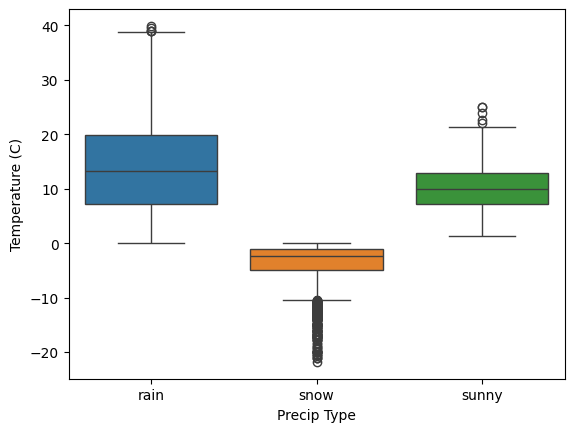

In [23]:
# Box-Plot
sns.boxplot(data = dados, y = 'Temperature (C)', x = 'Precip Type', hue='Precip Type' );

In [25]:
# Separando o Dataset
dias_sol = dados[ ( dados['Precip Type'] == 'sunny') ]
dias_chuva = dados[ ( dados['Precip Type'] == 'rain')]
dias_neve = dados[ (dados['Precip Type'] == 'snow')  ]

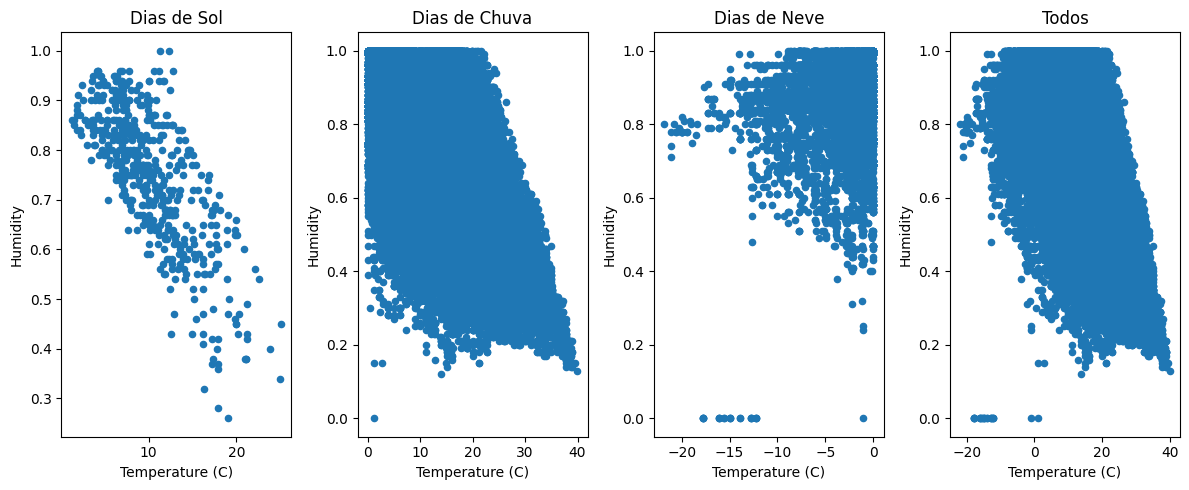

In [27]:
# Gráficos de Umidade em Função da Temperatura
fig, ax = plt.subplots(1, 4, figsize=(12,5))
dias_sol.plot(x = 'Temperature (C)', y = 'Humidity', kind='scatter', ax=ax[0], title='Dias de Sol')
dias_chuva.plot(x = 'Temperature (C)', y = 'Humidity', kind='scatter', ax=ax[1], title='Dias de Chuva')
dias_neve.plot(x= 'Temperature (C)', y= 'Humidity', kind='scatter', ax=ax[2], title='Dias de Neve')
dados.plot(x = 'Temperature (C)', y = 'Humidity', kind='scatter', ax=ax[3], title='Todos')

plt.tight_layout();

##### Dos gráficos gerados podemos observar que os **Dias de Sol** apresentam uma relação mais próxima da linear, **Dias de Chuva** apresentam uma possível relação linear porém com uma dispersão maior. Já os **Dias de Neve** não é clara a presença de refressão linear.

# **Dias de Sol**

In [28]:
dias_sol.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 517 entries, 52672 to 95588
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Precip Type               517 non-null    object 
 1   Temperature (C)           517 non-null    float64
 2   Apparent Temperature (C)  517 non-null    float64
 3   Humidity                  517 non-null    float64
 4   Wind Speed (km/h)         517 non-null    float64
 5   Wind Bearing (degrees)    517 non-null    float64
 6   Visibility (km)           517 non-null    float64
 7   Loud Cover                517 non-null    float64
 8   Pressure (millibars)      517 non-null    float64
dtypes: float64(8), object(1)
memory usage: 40.4+ KB


In [30]:
dias_sol.isna().sum()

Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
dtype: int64

### **Previsão da Humidade**

In [36]:
X = dias_sol.drop( ['Humidity', 'Precip Type'], axis=1).values # .values converte para numpy array
y = dias_sol['Humidity'].values # .values converte para numpy array

#### **Separando amostras em Treino e Teste**

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [43]:
Xtrain, Xtest, ytrain, yteste = train_test_split(X, y, test_size=0.30, random_state = 0)

In [44]:
Xtrain.size

2527

In [45]:
Xtest.size

1092

In [46]:
modelo = LinearRegression()
modelo.fit(Xtrain, ytrain)
ypred = modelo.predict(Xtest)

In [55]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

rmse = mean_squared_error(yteste, ypred)
mae = np.sqrt( mean_absolute_error(yteste, ypred) )

print('Roor Mean Squared Error = {:0.4f}'.format(rmse))
print('Mean Absolute Error = {:0.4f}'.format(mae))

Roor Mean Squared Error = 0.0074
Mean Absolute Error = 0.2556


# **Dias de Chuva**

In [56]:
dias_chuva.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85224 entries, 0 to 96452
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Precip Type               85224 non-null  object 
 1   Temperature (C)           85224 non-null  float64
 2   Apparent Temperature (C)  85224 non-null  float64
 3   Humidity                  85224 non-null  float64
 4   Wind Speed (km/h)         85224 non-null  float64
 5   Wind Bearing (degrees)    85224 non-null  float64
 6   Visibility (km)           85224 non-null  float64
 7   Loud Cover                85224 non-null  float64
 8   Pressure (millibars)      85224 non-null  float64
dtypes: float64(8), object(1)
memory usage: 6.5+ MB


In [57]:
dias_chuva.isna().sum()

Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
dtype: int64

### **Previsão da Humidade**

In [59]:
X = dias_chuva.drop( ['Humidity', 'Precip Type'], axis=1).values
y = dias_chuva['Humidity'].values

#### **Separando amostras em Treino e Teste**

In [60]:
from sklearn.model_selection import train_test_split

In [65]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=0.30, random_state=0)

In [72]:
modelo_chuva = LinearRegression()
modelo_chuva.fit(Xtrain, ytrain)
ypred = modelo_chuva.predict(Xtest)

In [73]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [74]:
mae_chuva = mean_absolute_error(ytest, ypred)
rmse_chuva = np.sqrt( mean_squared_error(ytest, ypred ))

print('Mean Absolute Error : {:0.4f}'.format(mae_chuva))
print('Root Mean Squares Error : {:4.4f}'.format(rmse_chuva))

Mean Absolute Error : 0.1105
Root Mean Squares Error : 0.1402


# **Dias de Neve**

In [75]:
dias_neve.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10712 entries, 1562 to 93506
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Precip Type               10712 non-null  object 
 1   Temperature (C)           10712 non-null  float64
 2   Apparent Temperature (C)  10712 non-null  float64
 3   Humidity                  10712 non-null  float64
 4   Wind Speed (km/h)         10712 non-null  float64
 5   Wind Bearing (degrees)    10712 non-null  float64
 6   Visibility (km)           10712 non-null  float64
 7   Loud Cover                10712 non-null  float64
 8   Pressure (millibars)      10712 non-null  float64
dtypes: float64(8), object(1)
memory usage: 836.9+ KB


In [76]:
dias_neve.isna().sum()

Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
dtype: int64

In [77]:
X = dados.drop(['Precip Type', 'Humidity'], axis=1).values
y = dados['Humidity'].values

#### **Separando amostras em Treino e Teste**

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.30, random_state = 0)

In [85]:
modelo_neve = LinearRegression()
modelo_neve.fit(Xtrain, ytrain)
ypred_neve = modelo.predict(Xtest)

In [86]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [87]:
mae_neve = mean_absolute_error(ytest, ypred_neve)
rmse_neve = np.sqrt( mean_squared_error(ytest, ypred_neve))

print('Mean Absolute Error: {:0.4f}'.format(mae_neve))
print('Root Mean Squared Error: {:0.4f}'.format(rmse_neve))

Mean Absolute Error: 0.1140
Root Mean Squared Error: 0.1457
